<a href="https://colab.research.google.com/github/mostafa-ja/Anomaly-detection/blob/main/LSTM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import json
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [5]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    cosine_similarity = dot_product / (norm1 * norm2)
    return cosine_similarity


In [6]:
with open('/content/hdfs_event2semantic_vec.json') as f:
    # Step1-1 open file
    gdp_list = json.load(f)
    value = list(gdp_list.values())

In [7]:
print(len(value))
print(len(value[0]))

29
300


In [8]:
components = None
pca = PCA(n_components = 20) # n_components can not be greater than 29 , because we have 29 data and if they are compeletely independent , we could have 29D, same as one hot encoding
# perform PCA on the scaled data
pca_result = pca.fit_transform(value)

# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print(sum(pca.explained_variance_ratio_ * 100)) #the percentage of variance for 20D


Variances (Percentage):
[26.38436577 11.54957801  8.87619262  8.09854493  5.83096291  4.95880394
  4.05582561  3.81095343  3.24716904  2.76424442  2.52277546  2.38701665
  1.98277494  1.86786663  1.6366585   1.51299209  1.47744943  1.28605957
  1.2501469   0.99433261]
96.49471344390082


In [9]:
print(pca_result.shape)

(29, 20)


In [10]:
with open('/content/hdfs_event2semantic_vec.json') as f:
    # Step1-1 open file
    gdp_list = json.load(f)
    value = list(gdp_list.values())

    # Step1-2 PCA: Dimensionality reduction to 20-dimensional data

    estimator = PCA(n_components=20)
    pca_result = estimator.fit_transform(value)

    # Step1-3 PPA: De-averaged
    ppa_result = []
    result = pca_result - np.mean(pca_result)
    pca = PCA(n_components=20)
    pca_result = pca.fit_transform(result)
    U = pca.components_
    for i, x in enumerate(result):
        for u in U[0:7]:
            x = x - np.dot(u.transpose(), x) * u
        ppa_result.append(list(x))
    ppa_result = np.array(ppa_result)


In [11]:
similarity = cosine_similarity(value[0], value[1])
print("Cosine Similarity:", similarity)


Cosine Similarity: 0.27651085126256936


In [12]:
similarity = cosine_similarity(pca_result[0], pca_result[1])
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.21585695356706583


In [13]:
similarity = cosine_similarity(ppa_result[0], ppa_result[1])
print("Cosine Similarity:", similarity) # we get lower score , it means that we separate diffrent templates

Cosine Similarity: 0.1741783979116341


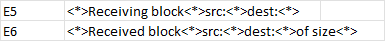

In [14]:
cosine_similarity(value[22], value[23])

0.6125285006859826

In [15]:
cosine_similarity(value[4], value[5])

0.9637073461058401

In [16]:
for i in range(len(value)):
  similarity = cosine_similarity(value[0], value[i])
  print("Cosine Similarity", i, ":", similarity)


Cosine Similarity 0 : 0.9999999999999998
Cosine Similarity 1 : 0.27651085126256936
Cosine Similarity 2 : 0.18122023805649887
Cosine Similarity 3 : 0.3267673760215494
Cosine Similarity 4 : 0.19405120213133703
Cosine Similarity 5 : 0.20316513371303502
Cosine Similarity 6 : 0.2639310231083585
Cosine Similarity 7 : 0.15637567678739486
Cosine Similarity 8 : 0.24820938538048493
Cosine Similarity 9 : 0.1561963943455993
Cosine Similarity 10 : 0.2372774115291913
Cosine Similarity 11 : 0.29712514758161357
Cosine Similarity 12 : 0.2278927913226847
Cosine Similarity 13 : 0.28872930529168567
Cosine Similarity 14 : 0.4392014716690768
Cosine Similarity 15 : 0.13692091522222488
Cosine Similarity 16 : 0.25919821759075473
Cosine Similarity 17 : 0.36363383721916986
Cosine Similarity 18 : 0.28679718478954275
Cosine Similarity 19 : 0.36286394372749203
Cosine Similarity 20 : 0.3932855801000819
Cosine Similarity 21 : 0.381467123264216
Cosine Similarity 22 : 0.5077544939704627
Cosine Similarity 23 : 0.5305253

In [17]:
for i in range(len(value)):
  similarity = cosine_similarity(ppa_result[0], ppa_result[i])
  print("Cosine Similarity", i, ":", similarity)

Cosine Similarity 0 : 1.0
Cosine Similarity 1 : 0.1741783979116341
Cosine Similarity 2 : 0.0493952189889063
Cosine Similarity 3 : -0.12110205166171253
Cosine Similarity 4 : 0.4949030223096774
Cosine Similarity 5 : -0.36309477407223495
Cosine Similarity 6 : -0.15579346821526416
Cosine Similarity 7 : 0.15441210513430262
Cosine Similarity 8 : -0.39983119924253396
Cosine Similarity 9 : 0.17218881653353296
Cosine Similarity 10 : 0.27673970945399423
Cosine Similarity 11 : -0.003356796468733433
Cosine Similarity 12 : -0.02221830077151306
Cosine Similarity 13 : 0.058041876946014086
Cosine Similarity 14 : -0.05381434457666614
Cosine Similarity 15 : -0.026950592332469072
Cosine Similarity 16 : -0.5163487074011823
Cosine Similarity 17 : -0.03393731379219344
Cosine Similarity 18 : -0.024216832845201562
Cosine Similarity 19 : -0.31041876009404873
Cosine Similarity 20 : -0.3879588455974878
Cosine Similarity 21 : 0.06479137940119888
Cosine Similarity 22 : -0.2168865550818318
Cosine Similarity 23 : 0.

In [18]:
# Load the data from the JSON file
with open('/content/templates2vec.json', 'r') as file:
    vector_list = json.load(file)

# Convert the list of lists back to a list of numpy arrays
templates2vec = [np.array(vector) for vector in vector_list]

In [19]:
print(len(templates2vec))
print(len(templates2vec[0]))

30
384


In [20]:
# adding template 30 with zeros vector for session with less than windows size
templates2vec.append(np.zeros((384,)))

In [21]:
 # Step1-2 PCA: Dimensionality reduction to 20-dimensional data

estimator = PCA(n_components=20)
pca_result = estimator.fit_transform(templates2vec)

# Step1-3 PPA: De-averaged
ppa_result = []
result = pca_result - np.mean(pca_result)
pca = PCA(n_components=20)
pca_result = pca.fit_transform(result)
U = pca.components_
for i, x in enumerate(result):
    for u in U[0:7]:
        x = x - np.dot(u.transpose(), x) * u
    ppa_result.append(list(x))
ppa_result = np.array(ppa_result)


In [22]:
# print the explained variances
print("Variances (Percentage):")
print(estimator.explained_variance_ratio_ * 100)
print(sum(estimator.explained_variance_ratio_ * 100)) #the percentage of variance for 20D

Variances (Percentage):
[16.95108926  9.71132818  7.55464857  7.04759043  6.38652924  5.76441679
  4.85326883  4.5453545   4.18886277  3.4996711   3.22281884  2.91269412
  2.62583848  2.48996362  2.32962006  1.9817766   1.91291862  1.75078388
  1.60065955  1.51227075]
92.84210418748184


In [23]:
print(len(ppa_result))
print(len(ppa_result[0]))

31
20


In [24]:
# download datasets
!wget 'https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_train'
!wget 'https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_test_normal'
!wget 'https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_test_abnormal'

--2023-07-20 23:20:49--  https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257875 (252K) [text/plain]
Saving to: ‘hdfs_train’

hdfs_train          100%[===================>] 251.83K  --.-KB/s    in 0.005s  

2023-07-20 23:20:49 (48.3 MB/s) - ‘hdfs_train’ saved [257875/257875]

--2023-07-20 23:20:49--  https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_test_normal
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29284282 (28M) 

In [25]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader
import os
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
names = ['hdfs_train','hdfs_test_normal','hdfs_test_abnormal']
templates = set()

for name in names:
  with open('/content/' + name, 'r') as f:
          for row in f:
            for temp in row.split():
              templates.add(temp)

print(templates)

{'21', '6', '1', '27', '5', '2', '28', '19', '15', '4', '20', '14', '18', '25', '7', '9', '26', '23', '10', '24', '3', '13', '17', '8', '22', '11', '12', '16'}


In [27]:
sorted([int(num) for num in templates])


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [28]:
name = 'hdfs_train'
window_size = 10
num_sessions = 0
inputs = []
outputs = []

with open('/content/' + name, 'r') as f:
        for row in f:
            num_sessions += 1
            line = [ppa_result[int(i) - 1] for i in row.strip().split()] # we substract by one from templates index for starting from zero
            for i in range(len(line) - window_size):
                inputs.append(line[i:i + window_size])
                outputs.append(line[i + window_size])

print('Number of sessions({}): {}'.format(name, num_sessions))
print('Number of seqs({}): {}'.format(name, len(inputs)))
dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float), torch.tensor(outputs,dtype=torch.float ))

Number of sessions(hdfs_train): 4855
Number of seqs(hdfs_train): 46575


<ipython-input-28-5ae3517f921c>:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float), torch.tensor(outputs,dtype=torch.float ))


In [29]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))  # out.shape : [batch_size, sequence_length, hidden_size]
        out = self.fc(out[:, -1, :]) #The : before , -1, : indicates that we want to include all elements along the first dimension (batch dimension). -1 represents the index of the last element along the second dimension (sequence length). : after , -1 indicates that we want to include all elements along the third dimension (hidden size)
        return out

In [30]:
input_size = 20
num_layers = 2
hidden_size = 64
num_classes = 20
batch_size = 2048
num_epochs = 200

In [31]:
model = Model(input_size, hidden_size, num_layers, num_classes).to(device)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [32]:
# Train the model
start_time = time.time()
total_step = len(dataloader)
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    train_loss = 0
    for step, (seq, label) in enumerate(dataloader):
        # Forward pass
        seq = seq.clone().detach().view(-1, window_size, input_size).to(device)
        output = model(seq)
        loss = criterion(output, label.to(device))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print('Epoch [{}/{}], train_loss: {:.4f}'.format(epoch + 1, num_epochs, train_loss / total_step))
elapsed_time = time.time() - start_time
print('elapsed_time: {:.3f}s'.format(elapsed_time))
print('Finished Training')

Epoch [1/200], train_loss: 0.0091
Epoch [2/200], train_loss: 0.0071
Epoch [3/200], train_loss: 0.0060
Epoch [4/200], train_loss: 0.0047
Epoch [5/200], train_loss: 0.0040
Epoch [6/200], train_loss: 0.0035
Epoch [7/200], train_loss: 0.0032
Epoch [8/200], train_loss: 0.0030
Epoch [9/200], train_loss: 0.0028
Epoch [10/200], train_loss: 0.0027
Epoch [11/200], train_loss: 0.0026
Epoch [12/200], train_loss: 0.0025
Epoch [13/200], train_loss: 0.0025
Epoch [14/200], train_loss: 0.0024
Epoch [15/200], train_loss: 0.0024
Epoch [16/200], train_loss: 0.0023
Epoch [17/200], train_loss: 0.0023
Epoch [18/200], train_loss: 0.0023
Epoch [19/200], train_loss: 0.0023
Epoch [20/200], train_loss: 0.0022
Epoch [21/200], train_loss: 0.0022
Epoch [22/200], train_loss: 0.0022
Epoch [23/200], train_loss: 0.0021
Epoch [24/200], train_loss: 0.0021
Epoch [25/200], train_loss: 0.0021
Epoch [26/200], train_loss: 0.0020
Epoch [27/200], train_loss: 0.0020
Epoch [28/200], train_loss: 0.0020
Epoch [29/200], train_loss: 0

In [33]:
num_candidates = 9 # on paper is g , top-g(here top 9) probabilities to appear next are considered normal


In [34]:
def generate(name):
    # If you what to replicate the DeepLog paper results(Actually, I have a better result than DeepLog paper results),
    # you should use the 'list' not 'set' to obtain the full dataset, I use 'set' just for test and acceleration.
    hdfs = set()
    # hdfs = []
    with open('/content/' + name, 'r') as f:
        for row in f:
            line = [int(i) - 1 for i in row.strip().split()]
            line = line + [30] * (window_size + 1 - len(line)) #if the length of the line is less than windows size, it covers by 30 a template with zeros vector
            hdfs.add(tuple(line))
            # hdfs.append(tuple(line))
    print('Number of sessions({}): {}'.format(name, len(hdfs)))
    return hdfs

In [35]:
test_normal_loader = generate('hdfs_test_normal')
test_abnormal_loader = generate('hdfs_test_abnormal')

Number of sessions(hdfs_test_normal): 14177
Number of sessions(hdfs_test_abnormal): 4123


In [44]:
ppa_result[10]

array([ 0.00000000e+00,  1.05725075e-16,  2.23860680e-16, -1.91633583e-16,
        2.29297043e-16,  5.33327984e-17,  3.13117587e-16, -9.63968152e-02,
       -2.97057767e-04,  4.03384685e-02,  5.60153159e-02,  2.55694891e-02,
        1.05996333e-02, -9.02890729e-02, -4.59559163e-02,  1.29812077e-01,
       -4.33909911e-02, -6.78539087e-02, -7.97822469e-02,  7.21287747e-02])

In [41]:
label

tensor([ 0.0000e+00,  1.0573e-16,  2.2386e-16, -1.9163e-16,  2.2930e-16,
         5.3333e-17,  3.1312e-16, -9.6397e-02, -2.9706e-04,  4.0338e-02,
         5.6015e-02,  2.5569e-02,  1.0600e-02, -9.0289e-02, -4.5956e-02,
         1.2981e-01, -4.3391e-02, -6.7854e-02, -7.9782e-02,  7.2129e-02],
       device='cuda:0', dtype=torch.float64)

In [45]:
output[0]

tensor([ 1.7094e-03,  6.5550e-04,  1.3084e-03, -1.0537e-04, -2.2506e-03,
        -5.0772e-04, -2.1036e-04, -9.3410e-02, -1.5077e-02,  2.9976e-02,
         4.0161e-02,  1.2393e-02,  1.6254e-02, -9.2929e-02, -4.9094e-02,
         1.1717e-01, -4.5852e-02, -5.2237e-02, -7.1752e-02,  6.4094e-02],
       device='cuda:0')

In [39]:
print(cosine_similarity(ppa_result[10],output[0].cpu()))

0.991195049883028


In [43]:
cosine_similarity(label.cpu(),output[0].cpu())

0.991195049883028

In [52]:
ppa_result.shape

(31, 20)

In [48]:
label.cpu().shape

torch.Size([20])

In [49]:
output.cpu().shape

torch.Size([1, 20])

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between vec1 and vec2
similarity_matrix = cosine_similarity(label.cpu().reshape(1, -1), output.cpu().reshape(1, -1))

# The result will be a 2D array representing the cosine similarity between the vectors
print(similarity_matrix)


[[0.99119509]]


In [58]:
np.argsort(cosine_similarity(output.cpu().reshape(1, -1),ppa_result))[0][-num_candidates:]


array([ 6, 27, 11, 20, 14, 23,  1,  7, 10])

In [73]:
with torch.no_grad():
    for line in test_normal_loader:
        for i in range(len(line) - window_size):
            session = line[i:i + window_size]
            seq = [ppa_result[temp] for temp in session]
            label = line[i + window_size]
            seq = torch.tensor(seq, dtype=torch.float).view(-1, window_size, input_size).to(device)
            output = model(seq)
            predicted = np.argsort(cosine_similarity(output.cpu().reshape(1, -1),ppa_result))[0][-num_candidates:]
            if label not in predicted:
                print('ok')
                print(line)
                print(session)
                print(label)
                print(predicted)
                print('---------------------')
                FP += 1
                fp_set.add(line)
                break


ok
(4, 21, 4, 4, 10, 8, 8, 10, 8, 25, 10, 25, 25, 3, 2, 3, 1, 22, 22, 22, 20, 20, 20)
(4, 10, 8, 8, 10, 8, 25, 10, 25, 25)
3
[ 1 10 11 13  2 15  4 21 22]
---------------------
ok
(4, 4, 4, 21, 8, 10, 8, 25, 10, 10, 8, 25, 25, 3, 2, 3, 1, 22, 22, 22, 20, 20, 20)
(21, 8, 10, 8, 25, 10, 10, 8, 25, 25)
3
[12 10 13 11 15  2  4 21 22]
---------------------
ok
(21, 4, 4, 4, 10, 8, 10, 8, 10, 8, 25, 25, 25, 24, 17, 4, 5, 15, 25, 25, 20, 1, 24, 17, 4, 15, 5, 25, 25, 20, 24, 17, 4, 15, 5, 25, 25, 20)
(4, 10, 8, 10, 8, 10, 8, 25, 25, 25)
24
[ 1 11 13 10 15  2  4 21 22]
---------------------
ok
(21, 4, 4, 4, 25, 10, 8, 10, 8, 25, 25, 10, 8, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 2, 2, 3, 22, 22, 22, 20, 20, 20)
(8, 10, 8, 25, 25, 10, 8, 2, 3, 2)
1
[ 0 17 30 22 14 18 21  3  2]
---------------------
ok
(4, 4, 4, 21, 10, 8, 25, 25, 25, 10, 8, 10, 8, 24, 17, 4, 5, 15, 25, 25, 20, 24, 17, 4, 5, 15, 25, 25, 20, 24, 17, 4, 5, 15, 25, 25, 20)
(21, 10, 8, 25, 25, 25, 10, 8, 10, 8)
24
[23 30 14 18 22  4 21  3  2]
--

KeyboardInterrupt: ignored

In [69]:
# Test the model
TP = 0
FP = 0

fp_set = set()
fn_set = set()  # Initialize the FN list

start_time = time.time()
with torch.no_grad():
    for line in test_normal_loader:
        for i in range(len(line) - window_size):
            session = line[i:i + window_size]
            seq = [ppa_result[temp] for temp in session]
            label = line[i + window_size]
            seq = torch.tensor(seq, dtype=torch.float).view(-1, window_size, input_size).to(device)
            output = model(seq)
            predicted = np.argsort(cosine_similarity(output.cpu().reshape(1, -1),ppa_result))[0][-num_candidates:]
            if label not in predicted:
                FP += 1
                fp_set.add(line)
                break   #with just one wrong prediction in a line , we assume , abnormal
with torch.no_grad():
    for line in test_abnormal_loader:
        for i in range(len(line) - window_size):
            session = line[i:i + window_size]
            seq = [ppa_result[temp] for temp in session]
            label = line[i + window_size]
            seq = torch.tensor(seq, dtype=torch.float).view(-1, window_size, input_size).to(device)
            output = model(seq)
            predicted = np.argsort(cosine_similarity(output.cpu().reshape(1, -1),ppa_result))[0][-num_candidates:]
            if label not in predicted:
                TP += 1
                break
            else:
                fn_set.add(line)  # Append the line to the FN list when a false negative occurs

elapsed_time = time.time() - start_time
print('elapsed_time: {:.3f}s'.format(elapsed_time))
# Compute precision, recall and F1-measure
FN = len(test_abnormal_loader) - TP
P = 100 * TP / (TP + FP)
R = 100 * TP / (TP + FN)
F1 = 2 * P * R / (P + R)
print('false positive (FP): {}, false negative (FN): {}, Precision: {:.3f}%, Recall: {:.3f}%, F1-measure: {:.3f}%'.format(FP, FN, P, R, F1))
print('Finished Predicting')

elapsed_time: 161.869s
false positive (FP): 8303, false negative (FN): 11, Precision: 33.121%, Recall: 99.733%, F1-measure: 49.728%
Finished Predicting
